# Prediction for opening/closing of hospitals!
## Pre-processing for Data Cleaning
### Load Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test_ = pd.read_csv('test.csv')

In [3]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [4]:
train.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


* The percentage of NUll data is low. so Let's drop it

In [5]:
#train.dropna(axis=0, inplace=True)

In [6]:
#train.isnull().sum()

### How many Closed??

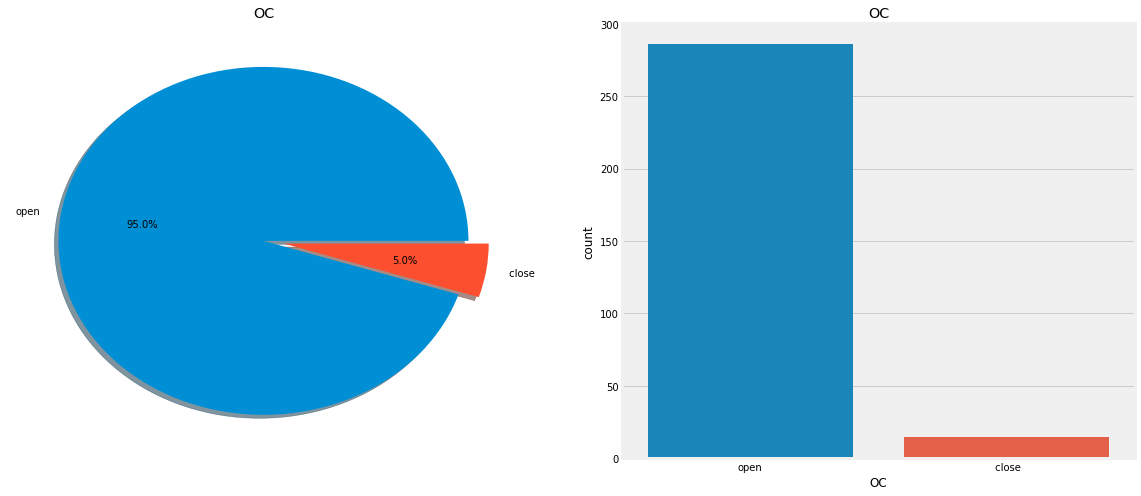

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['OC'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('OC')
ax[0].set_ylabel('')
sns.countplot('OC',data=train,ax=ax[1])
ax[1].set_title('OC')
plt.show()

* It is evident that not many hospitals closed.

###  Categorical Feature

In [8]:
train['OC'].value_counts()

open      286
 close     15
Name: OC, dtype: int64

In [9]:
train['OC'].replace(['open', ' close'],[1, 0], inplace=True)

In [10]:
train.groupby(['sido', 'OC'])['OC'].count()

sido       OC
busan      0      1
           1     25
choongbuk  1     13
choongnam  0      1
           1     22
daegu      1     14
daejeon    1     13
gangwon    1     10
gwangju    1      2
gyeongbuk  0      2
           1     37
gyeonggi   0      5
           1     44
gyeongnam  1     35
incheon    1     10
jeonbuk    0      2
           1     16
jeonnam    0      3
           1     18
sejong     1      1
seoul      0      1
           1     18
ulsan      1      8
Name: OC, dtype: int64

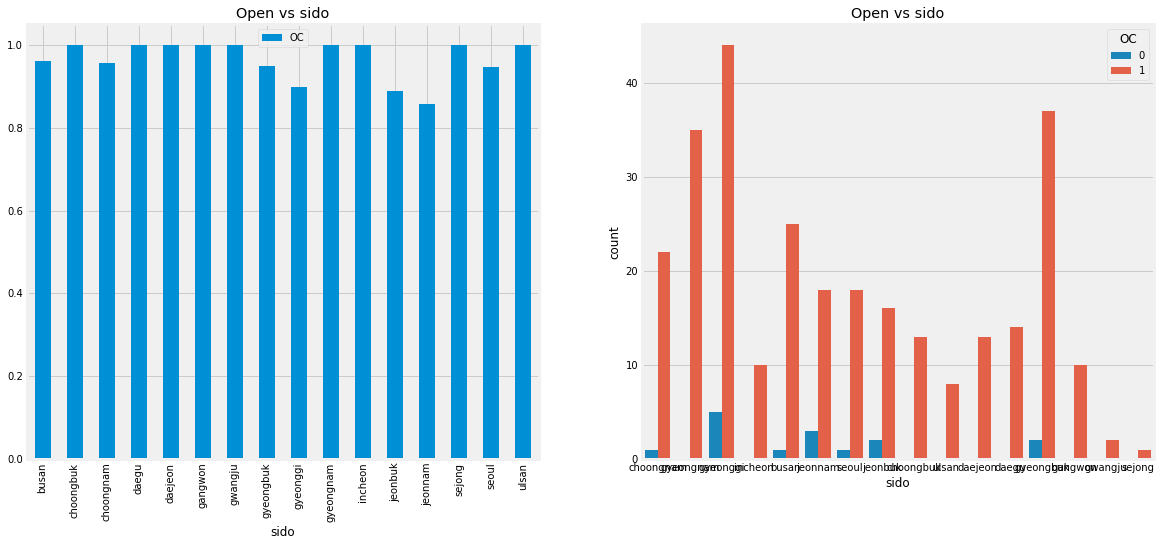

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['sido','OC']].groupby(['sido']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Open vs sido')
sns.countplot('sido',hue='OC',data=train,ax=ax[1])
ax[1].set_title('Open vs sido')
plt.show()

In [12]:
#ownerChange
train.groupby(['instkind', 'OC'])['OC'].count()

instkind              OC
clinic                0       1
                      1      17
dental_clinic         1       1
general_hospital      0       1
                      1      36
hospital              0       5
                      1      83
nursing_hospital      0       5
                      1     139
traditional_clinic    0       1
                      1       3
traditional_hospital  0       1
                      1       7
Name: OC, dtype: int64

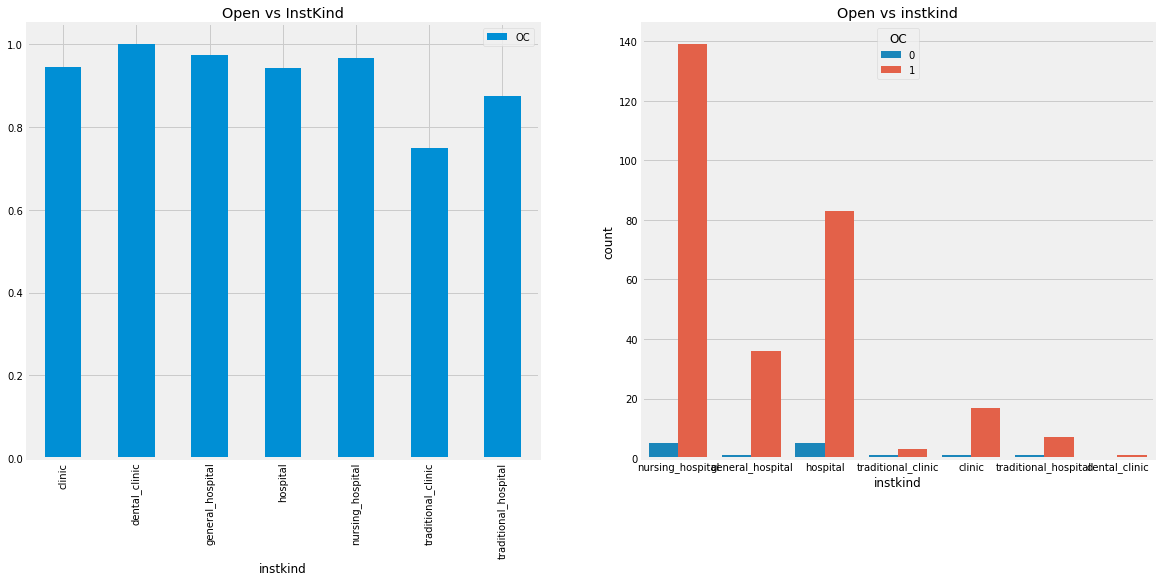

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['instkind','OC']].groupby(['instkind']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Open vs InstKind')
sns.countplot('instkind',hue='OC',data=train,ax=ax[1])
ax[1].set_title('Open vs instkind')
plt.show()

In [14]:
train.groupby(['ownerChange', 'OC'])['OC'].count()

ownerChange  OC
change       0       6
             1      36
same         0       5
             1     242
Name: OC, dtype: int64

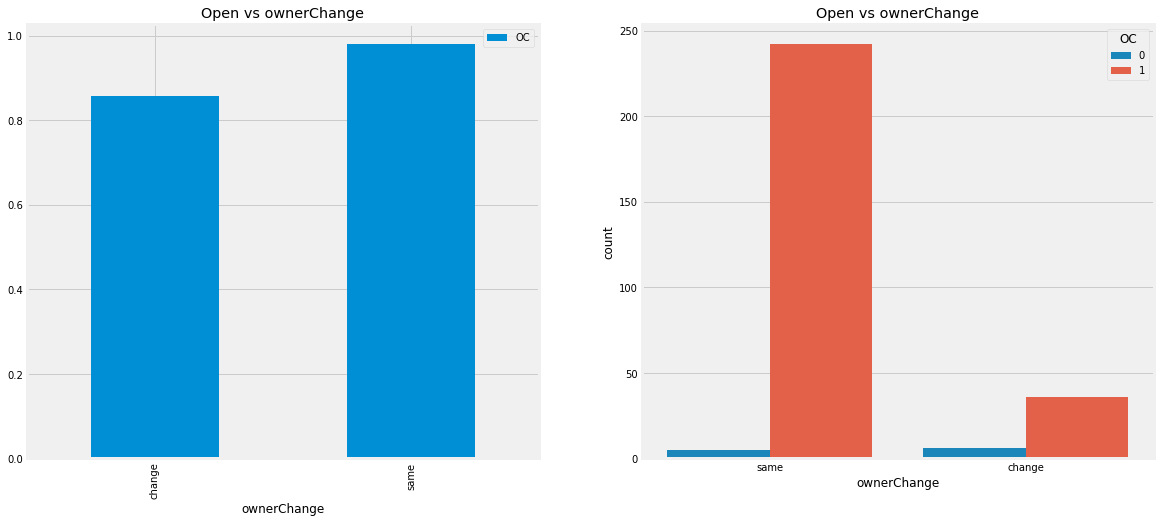

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['ownerChange','OC']].groupby(['ownerChange']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Open vs ownerChange')
sns.countplot('ownerChange',hue='OC',data=train,ax=ax[1])
ax[1].set_title('Open vs ownerChange')
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
inst_id               301 non-null int64
OC                    301 non-null int64
sido                  301 non-null object
sgg                   301 non-null int64
openDate              301 non-null int64
bedCount              296 non-null float64
instkind              300 non-null object
revenue1              293 non-null float64
salescost1            293 non-null float64
sga1                  293 non-null float64
salary1               293 non-null float64
noi1                  293 non-null float64
noe1                  293 non-null float64
interest1             293 non-null float64
ctax1                 293 non-null float64
profit1               293 non-null float64
liquidAsset1          293 non-null float64
quickAsset1           293 non-null float64
receivableS1          293 non-null float64
inventoryAsset1       293 non-null float64
nonCAsset1            293 non-null float64
ta

### Numerical Feature

#### sgg

In [17]:
print('sgg was of:',train['sgg'].max())
print('sgg was of:',train['sgg'].min())
print('sgg :',train['sgg'].mean())

sgg was of: 178
sgg was of: 1
sgg : 81.03986710963456


In [18]:
# continous 데이터 분석
def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue="OC", aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    # survived 라벨을 표시.
    facet.add_legend() 
    plt.show()

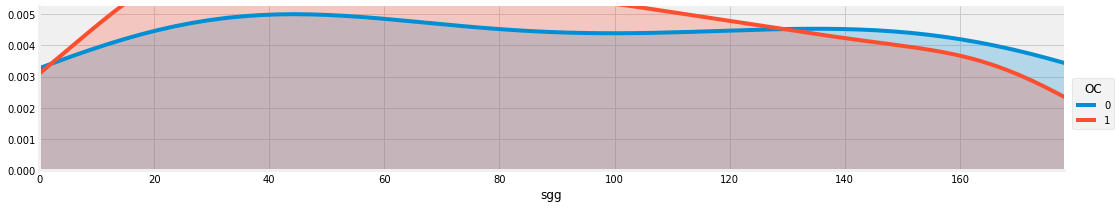

In [19]:
draw_facetgrid("sgg")

* sgg가 130을 넘으면 문을 닫을 확률이 크다.

### bedcount

In [20]:
print('max bedcount was of:',train['bedCount'].max())
print('min bedcount was of:',train['bedCount'].min())
print('mean bedcount :',train['bedCount'].mean())

max bedcount was of: 656.0
min bedcount was of: 0.0
mean bedcount : 145.70945945945945


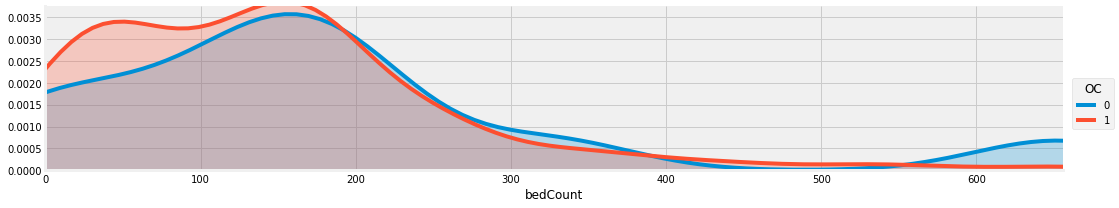

In [21]:
draw_facetgrid("bedCount")

* ~200까진 열확률이 높고, 200~400은 닫을 확률, 550~ 닫을 확률이 높다.

### revenue1

In [22]:
print('max revenue1 was of:',train['revenue1'].max())
print('min revenue1 was of:',train['revenue1'].min())
print('mean revenue1 :',train['revenue1'].mean())

max revenue1 was of: 151000000000.0
min revenue1 was of: 0.0
mean revenue1 : 12881747447.993174


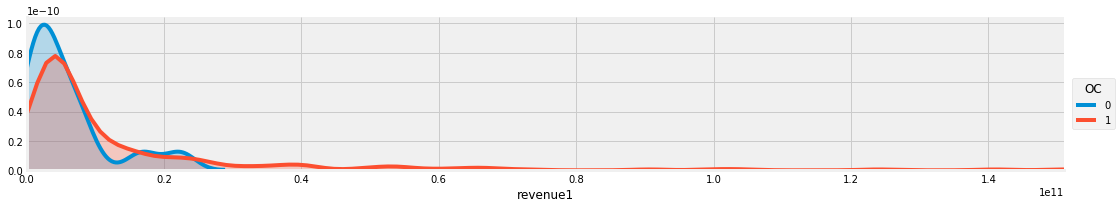

In [23]:
draw_facetgrid("revenue1")

### salescost1

In [24]:
print('max salescost1 was of:',train['salescost1'].max())
print('min salescost1 was of:',train['salescost1'].min())
print('mean salescost1 :',train['salescost1'].mean())

max salescost1 was of: 98503322990.0
min salescost1 was of: 0.0
mean salescost1 : 2014902794.5938566


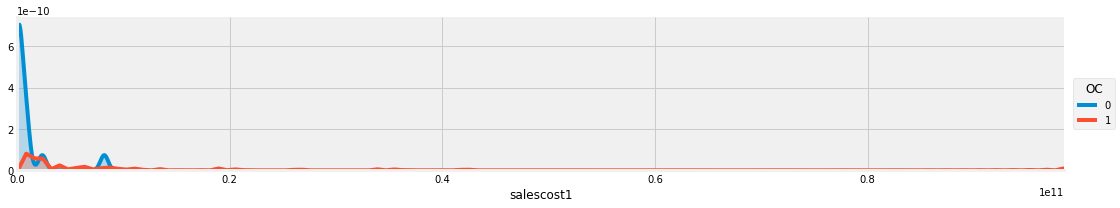

In [25]:
draw_facetgrid("salescost1")

### sga1

In [26]:
print('max sga1 was of:',train['sga1'].max())
print('min sga1 was of:',train['sga1'].min())
print('mean sga1 :',train['sga1'].mean())

max sga1 was of: 103000000000.0
min sga1 was of: 0.0
mean sga1 : 10332439064.088737


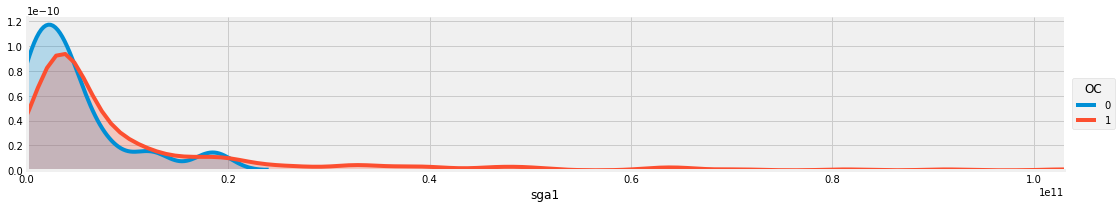

In [27]:
draw_facetgrid("sga1")

### salary1

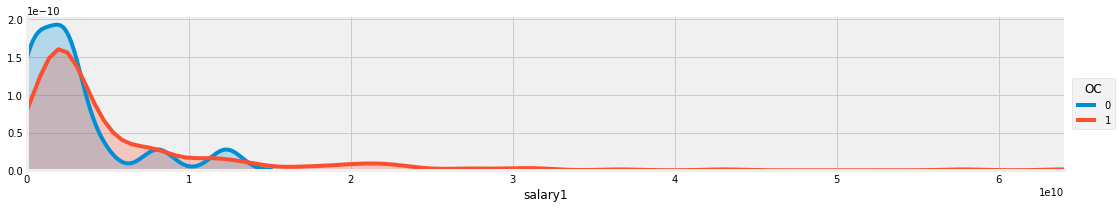

In [28]:
draw_facetgrid("salary1")

### noi1

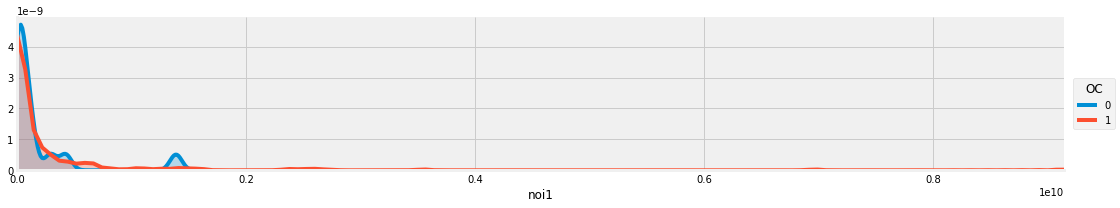

In [29]:
draw_facetgrid("noi1")

### noe1

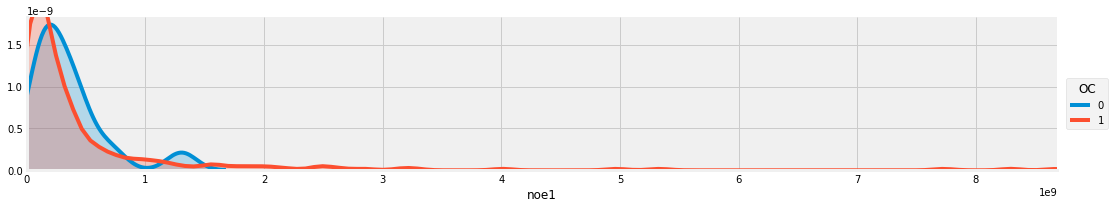

In [30]:
draw_facetgrid("noe1")

### interest1

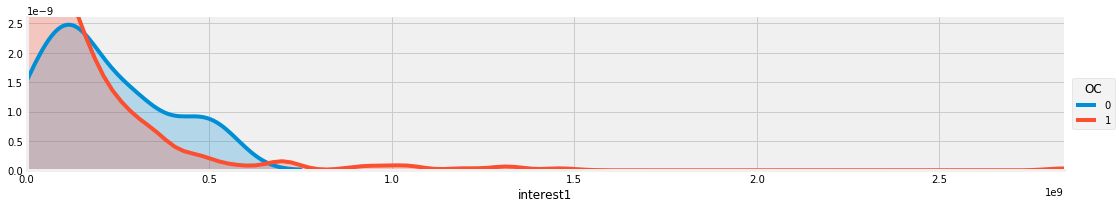

In [31]:
draw_facetgrid("interest1")

### ctax1

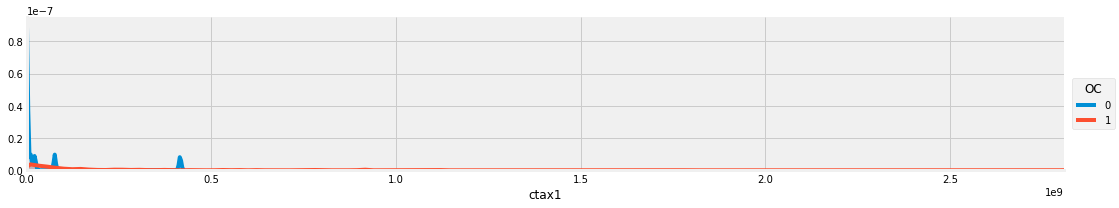

In [32]:
draw_facetgrid("ctax1")

### Profit1

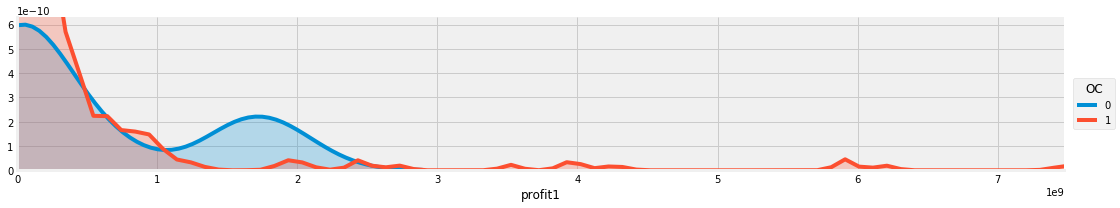

In [33]:
draw_facetgrid("profit1")

### liquidAsset1

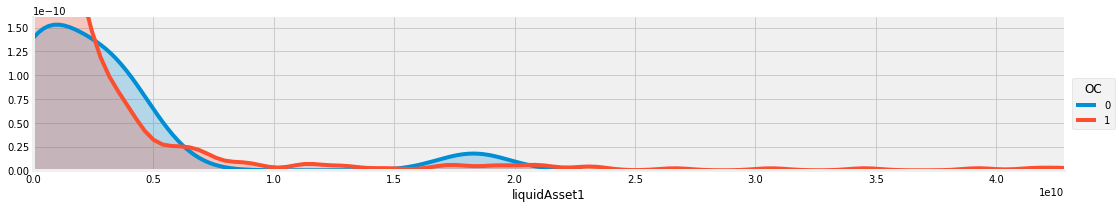

In [34]:
draw_facetgrid("liquidAsset1")

### openDate

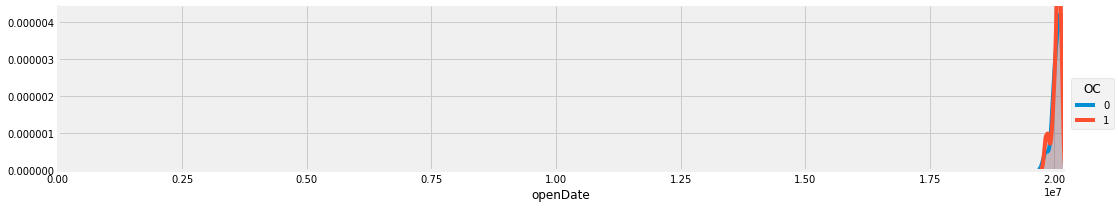

In [35]:
draw_facetgrid("openDate")

### quickAsset1

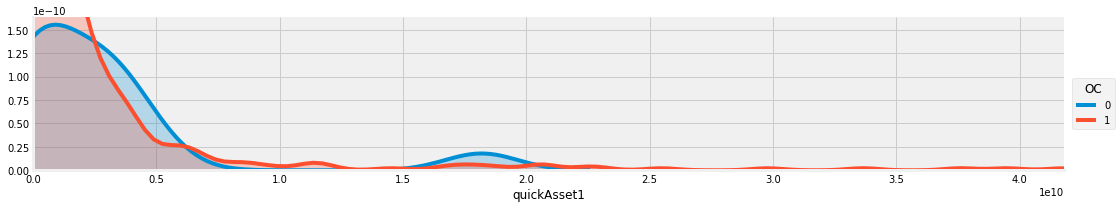

In [36]:
draw_facetgrid("quickAsset1")

### receivableS1

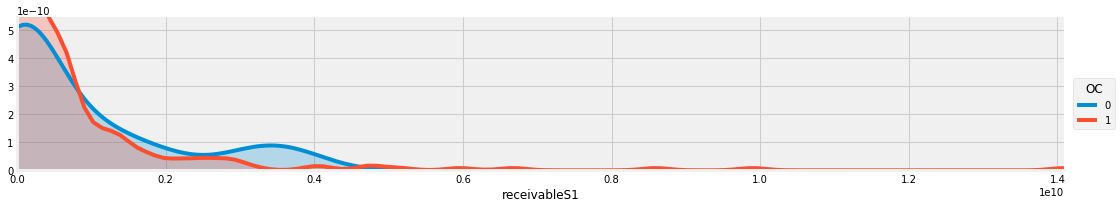

In [37]:
draw_facetgrid("receivableS1")

### inventoryAsset1

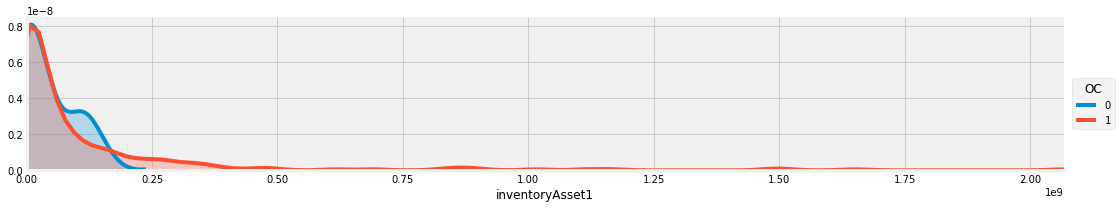

In [38]:
draw_facetgrid("inventoryAsset1")

### nonCAsset1

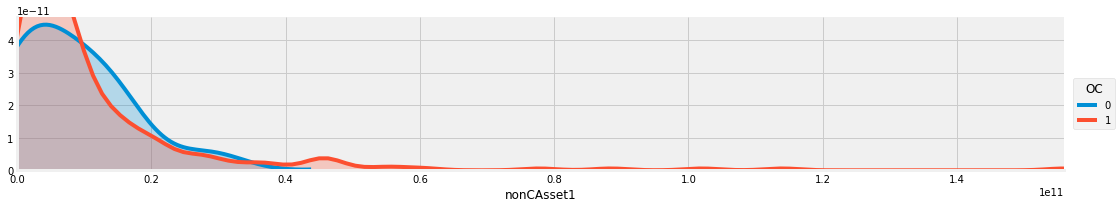

In [39]:
draw_facetgrid("nonCAsset1")

### tanAsset1

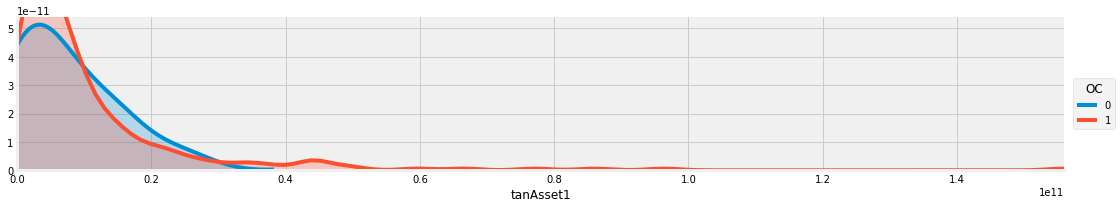

In [40]:
draw_facetgrid("tanAsset1")

### OnonCAsset1

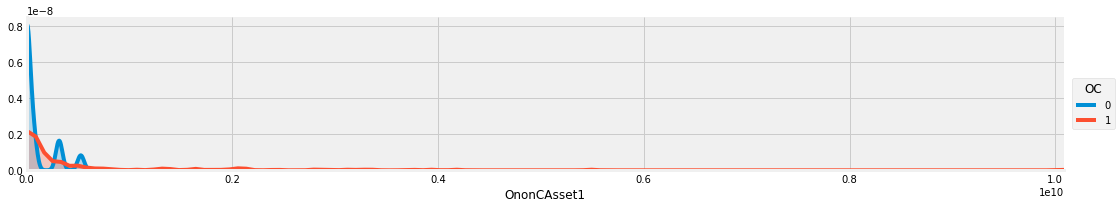

In [41]:
draw_facetgrid("OnonCAsset1")

### receivableL1

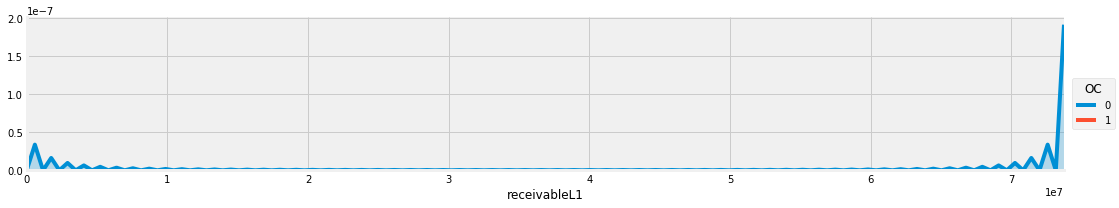

In [42]:
draw_facetgrid("receivableL1")

### debt1

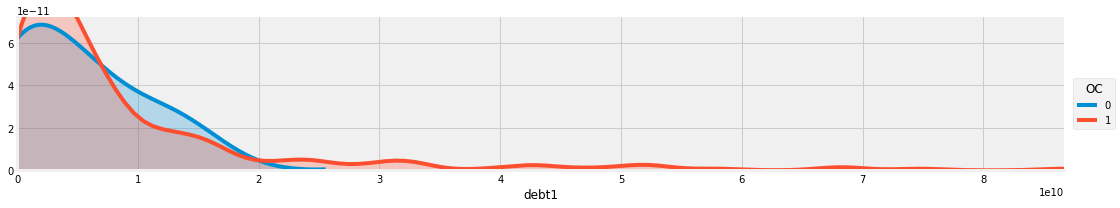

In [43]:
draw_facetgrid("debt1")

### liquidLiabilities1

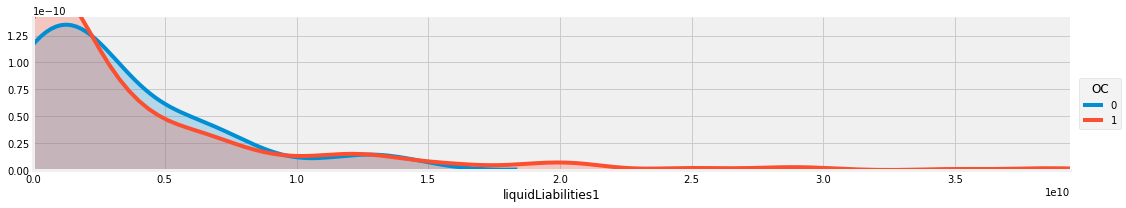

In [44]:
draw_facetgrid("liquidLiabilities1")

### shortLoan1

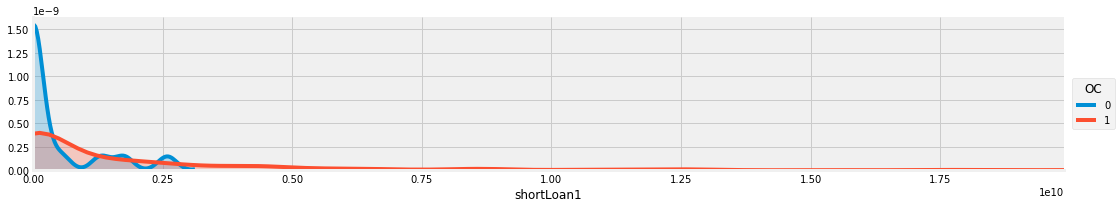

In [45]:
draw_facetgrid("shortLoan1")

### NCLiabilities1

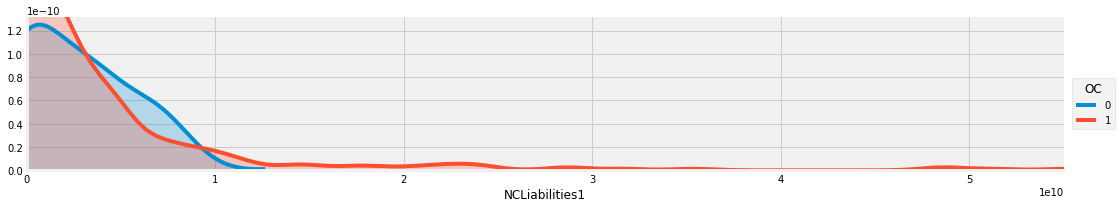

In [46]:
draw_facetgrid("NCLiabilities1")

### longLoan1

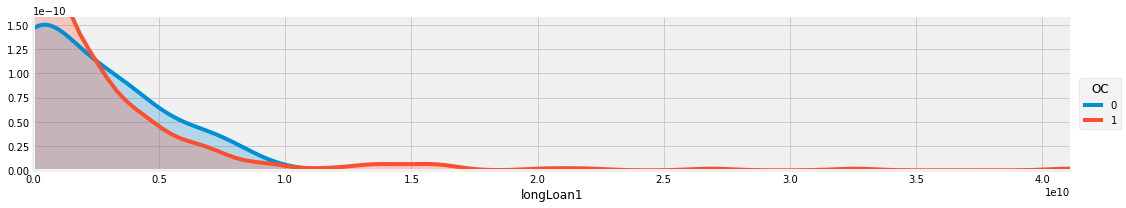

In [47]:
draw_facetgrid("longLoan1")

### netAsset1

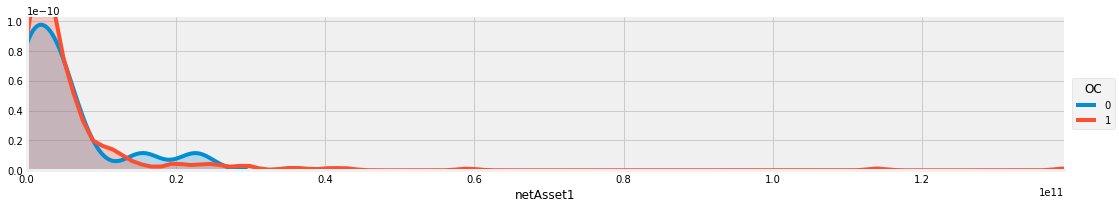

In [48]:
draw_facetgrid("netAsset1")

### Surplus1

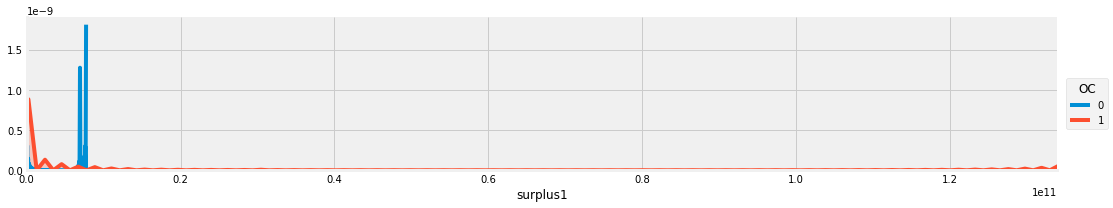

In [49]:
draw_facetgrid("surplus1")

## Feature Engineering and Variable Selection

### categorical variable

#### sido

In [50]:
train_test_data = [train, test_]

In [51]:
train['sido'].value_counts()

gyeonggi     49
gyeongbuk    39
gyeongnam    35
busan        26
choongnam    23
jeonnam      21
seoul        19
jeonbuk      18
daegu        14
daejeon      13
choongbuk    13
gangwon      10
incheon      10
ulsan         8
gwangju       2
sejong        1
Name: sido, dtype: int64

In [52]:
for dataset in train_test_data:
    dataset['sido'].replace(['busan', 'choongnam', 'gyenongbuk', 'gyeonggi', 'jeonbuk', 'jeonnam', 'seoul','gyeongnam', 'daegu', 'choongbuk','daejeon','gangwon','incheon','ulsan','gwangju','sejong'],[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],inplace=True)

### instkind

In [53]:
train['instkind'].value_counts()

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

In [54]:
for dataset in train_test_data:
    dataset['instkind'].replace(['traditional_hospital','traditional_clinic','nursing_hospital','hospital', 'general_hospital','clinic','dental_clinic'],[0,0,1,1,1,1,2],inplace=True)

In [55]:
for dataset in train_test_data:
    dataset['instkind'].fillna(0.0,inplace=True)

### ownerChange

In [56]:
train['ownerChange'].value_counts()

same      247
change     42
Name: ownerChange, dtype: int64

In [57]:
for dataset in train_test_data:
    dataset['ownerChange'].replace(['same', 'change'],[1,0],inplace=True)

In [58]:
for dataset in train_test_data:
    dataset['ownerChange'].fillna(1,inplace=True)

In [59]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,73,20071228,175.0,1.0,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,32,19970401,410.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,89,20161228,468.0,1.0,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,141,20000814,353.0,1.0,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,32,20050901,196.0,1.0,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### sggBand

In [60]:
train['sggBand'] = pd.cut(train['sgg'], 5)
train[['sggBand', 'OC']].groupby('sggBand', as_index=False).mean().sort_values(by='sggBand', ascending=True)

,sggBand,OC
0,"(0.823, 36.4]",0.932432
1,"(36.4, 71.8]",0.972222
2,"(71.8, 107.2]",0.965517
3,"(107.2, 142.6]",0.961538
4,"(142.6, 178.0]",0.911111


In [61]:
for dataset in train_test_data:
    dataset.loc[ dataset['sgg'] <= 36.4, 'sgg'] = 0,
    dataset.loc[(dataset['sgg'] > 36.4) & (dataset['sgg'] <= 71.8), 'sgg'] = 1,
    dataset.loc[(dataset['sgg'] > 71.8) & (dataset['sgg'] <= 107.2), 'sgg'] = 2,
    dataset.loc[(dataset['sgg'] > 107.2) & (dataset['sgg'] <= 142.6), 'sgg'] = 3,
    dataset.loc[ dataset['sgg'] > 142.6, 'sgg'] = 4

### bedCountBand

In [62]:
train['bcBand'] = pd.cut(train['bedCount'], 5)
train[['bcBand', 'OC']].groupby('bcBand', as_index=False).mean().sort_values(by='bcBand', ascending=True)

,bcBand,OC
0,"(-0.656, 131.2]",0.971223
1,"(131.2, 262.4]",0.960000
2,"(262.4, 393.6]",0.947368
3,"(393.6, 524.8]",1.000000
4,"(524.8, 656.0]",0.833333


In [63]:
for dataset in train_test_data:
    dataset.loc[ dataset['bedCount'] <= 131.2, 'bedCount'] = 3,
    dataset.loc[(dataset['bedCount'] > 131.2) & (dataset['bedCount'] <= 262.4), 'bedCount'] = 2,
    dataset.loc[(dataset['bedCount'] > 262.4) & (dataset['bedCount'] <= 393.6), 'bedCount'] = 1,
    dataset.loc[(dataset['bedCount'] > 393.6) & (dataset['bedCount'] <= 524.8), 'bedCount'] = 4,
    dataset.loc[ dataset['bedCount'] > 524.8, 'bedCount'] = 0

In [64]:
for dataset in train_test_data:
    dataset['bedCount'].fillna(4,inplace=True)

### revenue1, 2

In [65]:
train['revenue1Band'] = pd.cut(train['revenue1'], 5)
train[['revenue1Band', 'OC']].groupby('revenue1Band', as_index=False).mean().sort_values(by='revenue1Band', ascending=True)

,revenue1Band,OC
0,"(-151000000.0, 30200000000.0]",0.942966
1,"(30200000000.0, 60400000000.0]",1.000000
2,"(60400000000.0, 90600000000.0]",1.000000
3,"(90600000000.0, 120800000000.0]",1.000000
4,"(120800000000.0, 151000000000.0]",1.000000


In [66]:
train['revenue2Band'] = pd.cut(train['revenue2'], 5)
train[['revenue2Band', 'OC']].groupby('revenue2Band', as_index=False).mean().sort_values(by='revenue2Band', ascending=True)

,revenue2Band,OC
0,"(-137000000.0, 27400000000.0]",0.943182
1,"(27400000000.0, 54800000000.0]",1.000000
2,"(54800000000.0, 82200000000.0]",1.000000
3,"(82200000000.0, 109600000000.0]",1.000000
4,"(109600000000.0, 137000000000.0]",1.000000


In [67]:
for dataset in train_test_data:
    dataset.loc[ dataset['revenue1'] <= 30200000000.0, 'revenue1'] = 0,
    dataset.loc[ dataset['revenue1'] > 30200000000.0, 'revenue1'] = 1
    dataset.loc[ dataset['revenue2'] <= 27400000000.0, 'revenue2'] = 0,
    dataset.loc[ dataset['revenue2'] > 27400000000.0, 'revenue2'] = 1

In [68]:
for dataset in train_test_data:
    dataset['revenue1'].fillna(1,inplace=True)
    dataset['revenue2'].fillna(1,inplace=True)

In [69]:
train.drop(['revenue1Band', 'revenue2Band'],axis=1,inplace=True)

In [70]:
train.drop(['sggBand', 'bcBand'],axis=1,inplace=True)

In [71]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,20071228,2.0,1.0,0.0,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,0,19970401,4.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,2,20161228,4.0,1.0,0.0,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,3,20000814,1.0,1.0,1.0,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,0,20050901,2.0,1.0,1.0,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### salescost 1, 2

In [72]:
train['salescost1Band'] = pd.cut(train['salescost1'], 5)
train[['salescost1Band', 'OC']].groupby('salescost1Band', as_index=False).mean().sort_values(by='salescost1Band', ascending=True)

,salescost1Band,OC
0,"(-98503322.99, 19700664598.0]",0.947735
1,"(19700664598.0, 39401329196.0]",1.000000
2,"(39401329196.0, 59101993794.0]",1.000000
3,"(59101993794.0, 78802658392.0]",NaN
4,"(78802658392.0, 98503322990.0]",1.000000


In [73]:
for dataset in train_test_data:
    dataset.loc[ dataset['salescost1'] <= 19700664598.0, 'salescost1'] = 0,
    dataset.loc[ dataset['salescost1'] > 19700664598.0, 'salescost1'] = 1

In [74]:
train['salescost2Band'] = pd.cut(train['salescost2'], 5)
train[['salescost2Band', 'OC']].groupby('salescost2Band', as_index=False).mean().sort_values(by='salescost2Band', ascending=True)

,salescost2Band,OC
0,"(-86581590.331, 17316318066.2]",0.947368
1,"(17316318066.2, 34632636132.4]",1.000000
2,"(34632636132.4, 51948954198.6]",1.000000
3,"(51948954198.6, 69265272264.8]",NaN
4,"(69265272264.8, 86581590331.0]",1.000000


In [75]:
for dataset in train_test_data:
    dataset.loc[ dataset['salescost2'] <= 17316318066.2, 'salescost2'] = 0,
    dataset.loc[ dataset['salescost2'] > 17316318066.2, 'salescost2'] = 1

In [76]:
for dataset in train_test_data:
    dataset['salescost1'].fillna(1,inplace=True)
    dataset['salescost2'].fillna(1,inplace=True)

In [77]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,salescost1Band,salescost2Band
0,1,1,0,2,20071228,2.0,1.0,0.0,0.0,3.961135e+09,...,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0,"(-98503322.99, 19700664598.0]","(-86581590.331, 17316318066.2]"
1,3,1,1,0,19970401,4.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0,NaN,NaN
2,4,1,0,2,20161228,4.0,1.0,0.0,0.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0,"(-98503322.99, 19700664598.0]","(-86581590.331, 17316318066.2]"
3,7,1,1,3,20000814,1.0,1.0,1.0,0.0,7.067740e+10,...,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0,"(-98503322.99, 19700664598.0]","(-86581590.331, 17316318066.2]"
4,9,1,1,0,20050901,2.0,1.0,1.0,0.0,4.765605e+10,...,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0,"(-98503322.99, 19700664598.0]","(-86581590.331, 17316318066.2]"


In [78]:
train.drop(['salescost1Band', 'salescost2Band'],axis=1,inplace=True)

In [79]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,20071228,2.0,1.0,0.0,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,0,19970401,4.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,2,20161228,4.0,1.0,0.0,0.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,3,20000814,1.0,1.0,1.0,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,0,20050901,2.0,1.0,1.0,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### sga 1, 2

In [80]:
train['sga1Band'] = pd.cut(train['sga1'], 5)
train[['sga1Band', 'OC']].groupby('sga1Band', as_index=False).mean().sort_values(by='sga1Band', ascending=True)

,sga1Band,OC
0,"(-103000000.0, 20600000000.0]",0.941634
1,"(20600000000.0, 41200000000.0]",1.000000
2,"(41200000000.0, 61800000000.0]",1.000000
3,"(61800000000.0, 82400000000.0]",1.000000
4,"(82400000000.0, 103000000000.0]",1.000000


In [81]:
for dataset in train_test_data:
    dataset.loc[ dataset['sga1'] <= 20600000000.0, 'sga1'] = 0,
    dataset.loc[ dataset['sga1'] > 20600000000.0, 'sga1'] = 1

In [82]:
train['sga2Band'] = pd.cut(train['sga2'], 5)
train[['sga2Band', 'OC']].groupby('sga2Band', as_index=False).mean().sort_values(by='sga2Band', ascending=True)

,sga2Band,OC
0,"(-98378400.364, 19675680072.8]",0.942529
1,"(19675680072.8, 39351360145.6]",1.000000
2,"(39351360145.6, 59027040218.4]",1.000000
3,"(59027040218.4, 78702720291.2]",1.000000
4,"(78702720291.2, 98378400364.0]",1.000000


In [83]:
for dataset in train_test_data:
    dataset.loc[ dataset['sga2'] <= 19675680072.8, 'sga2'] = 0,
    dataset.loc[ dataset['sga2'] > 19675680072.8, 'sga2'] = 1

In [84]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,sga1Band,sga2Band
0,1,1,0,2,20071228,2.0,1.0,0.0,0.0,0.0,...,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0,"(-103000000.0, 20600000000.0]","(-98378400.364, 19675680072.8]"
1,3,1,1,0,19970401,4.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0,NaN,NaN
2,4,1,0,2,20161228,4.0,1.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0,"(-103000000.0, 20600000000.0]","(-98378400.364, 19675680072.8]"
3,7,1,1,3,20000814,1.0,1.0,1.0,0.0,1.0,...,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0,"(61800000000.0, 82400000000.0]","(59027040218.4, 78702720291.2]"
4,9,1,1,0,20050901,2.0,1.0,1.0,0.0,1.0,...,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0,"(41200000000.0, 61800000000.0]","(39351360145.6, 59027040218.4]"


In [85]:
for dataset in train_test_data:
    dataset['sga1'].fillna(1,inplace=True)
    dataset['sga2'].fillna(1,inplace=True)

In [86]:
train.drop(['sga1Band', 'sga2Band'],axis=1,inplace=True)

In [87]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,20071228,2.0,1.0,0.0,0.0,0.0,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,0,19970401,4.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,2,20161228,4.0,1.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,3,20000814,1.0,1.0,1.0,0.0,1.0,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,0,20050901,2.0,1.0,1.0,0.0,1.0,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### OpenDate

In [88]:
train['dateBand'] = pd.cut(train['openDate'], 5)
train[['dateBand', 'OC']].groupby('dateBand', as_index=False).mean().sort_values(by='dateBand', ascending=True)

,dateBand,OC
0,"(19779733.517, 19858220.6]",0.941176
1,"(19858220.6, 19936317.2]",1.000000
2,"(19936317.2, 20014413.8]",0.925000
3,"(20014413.8, 20092510.4]",0.968254
4,"(20092510.4, 20170607.0]",0.928571


In [89]:
for dataset in train_test_data:
    dataset.loc[ dataset['openDate'] <= 19858220.6, 'openDate'] = 2,
    dataset.loc[(dataset['openDate'] > 19858220.6) & (dataset['openDate'] <= 19936317.2), 'openDate'] = 4,
    dataset.loc[(dataset['openDate'] > 19936317.2) & (dataset['openDate'] <= 20014413.8), 'openDate'] = 1,
    dataset.loc[(dataset['openDate'] > 20014413.8) & (dataset['openDate'] <= 20092510.4), 'openDate'] = 3,
    dataset.loc[ dataset['openDate'] > 20092510.4, 'openDate'] = 0

In [90]:
test_['openDate'].fillna(4, inplace=True)

In [91]:
train.drop(['dateBand'],axis=1,inplace=True)

In [92]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,3,2.0,1.0,0.0,0.0,0.0,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,0,1,4.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,2,0,4.0,1.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,3,1,1.0,1.0,1.0,0.0,1.0,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,0,3,2.0,1.0,1.0,0.0,1.0,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### Salary 1, 2

In [93]:
train['s1Band'] = pd.cut(train['salary1'], 5)
train[['s1Band', 'OC']].groupby('s1Band', as_index=False).mean().sort_values(by='s1Band', ascending=True)

,s1Band,OC
0,"(-64035593.95, 12807118790.0]",0.942529
1,"(12807118790.0, 25614237580.0]",1.000000
2,"(25614237580.0, 38421356370.0]",1.000000
3,"(38421356370.0, 51228475160.0]",1.000000
4,"(51228475160.0, 64035593950.0]",1.000000


In [94]:
for dataset in train_test_data:
    dataset.loc[ dataset['salary1'] <= 12807118790.0, 'salary1'] = 0,
    dataset.loc[ dataset['salary1'] > 12807118790.0, 'salary1'] = 1

In [95]:
train['s2Band'] = pd.cut(train['salary2'], 5)
train[['s2Band', 'OC']].groupby('s2Band', as_index=False).mean().sort_values(by='s2Band', ascending=True)

,s2Band,OC
0,"(-61279110.456, 12255822091.2]",0.943396
1,"(12255822091.2, 24511644182.4]",1.000000
2,"(24511644182.4, 36767466273.6]",1.000000
3,"(36767466273.6, 49023288364.8]",1.000000
4,"(49023288364.8, 61279110456.0]",1.000000


In [96]:
for dataset in train_test_data:
    dataset.loc[ dataset['salary2'] <= 12255822091.2, 'salary2'] = 0,
    dataset.loc[ dataset['salary2'] > 12255822091.2, 'salary2'] = 1

In [97]:
for dataset in train_test_data:
    dataset['salary1'].fillna(1,inplace=True)
    dataset['salary2'].fillna(1,inplace=True)

In [98]:
train.drop(['s1Band', 's2Band'],axis=1,inplace=True)

### noi 1, 2

In [99]:
train['n1Band'] = pd.cut(train['noi1'], 5)
train[['n1Band', 'OC']].groupby('n1Band', as_index=False).mean().sort_values(by='n1Band', ascending=True)

,n1Band,OC
0,"(-9144170.639, 1828834127.8]",0.947368
1,"(1828834127.8, 3657668255.6]",1.000000
2,"(3657668255.6, 5486502383.4]",NaN
3,"(5486502383.4, 7315336511.2]",1.000000
4,"(7315336511.2, 9144170639.0]",1.000000


In [100]:
for dataset in train_test_data:
    dataset.loc[ dataset['noi1'] <= 1828834127.8, 'noi1'] = 0,
    dataset.loc[ dataset['noi1'] > 1828834127.8, 'noi1'] = 1

In [101]:
train['n2Band'] = pd.cut(train['noi2'], 5)
train[['n2Band', 'OC']].groupby('n2Band', as_index=False).mean().sort_values(by='n2Band', ascending=True)

,n2Band,OC
0,"(-4035894.971, 807178994.2]",0.945455
1,"(807178994.2, 1614357988.4]",1.000000
2,"(1614357988.4, 2421536982.6]",1.000000
3,"(2421536982.6, 3228715976.8]",1.000000
4,"(3228715976.8, 4035894971.0]",1.000000


In [102]:
for dataset in train_test_data:
    dataset.loc[ dataset['noi2'] <= 807178994.2, 'noi2'] = 0,
    dataset.loc[ dataset['noi2'] > 807178994.2, 'noi2'] = 1

In [103]:
for dataset in train_test_data:
    dataset['noi1'].fillna(1,inplace=True)
    dataset['noi2'].fillna(1,inplace=True)

In [104]:
train.drop(['n1Band', 'n2Band'],axis=1,inplace=True)

### noe1, 2

In [105]:
train['n1Band'] = pd.cut(train['noe1'], 5)
train[['n1Band', 'OC']].groupby('n1Band', as_index=False).mean().sort_values(by='n1Band', ascending=True)

,n1Band,OC
0,"(-8686379.5, 1737275900.0]",0.945055
1,"(1737275900.0, 3474551800.0]",1.000000
2,"(3474551800.0, 5211827700.0]",1.000000
3,"(5211827700.0, 6949103600.0]",1.000000
4,"(6949103600.0, 8686379500.0]",1.000000


In [106]:
for dataset in train_test_data:
    dataset.loc[ dataset['noe1'] <= 1737275900.0, 'noe1'] = 0,
    dataset.loc[ dataset['noe1'] > 1737275900.0, 'noe1'] = 1

In [107]:
train['n2Band'] = pd.cut(train['noe2'], 5)
train[['n2Band', 'OC']].groupby('n2Band', as_index=False).mean().sort_values(by='n2Band', ascending=True)

,n2Band,OC
0,"(-8826977.467, 1765395493.4]",0.947566
1,"(1765395493.4, 3530790986.8]",0.944444
2,"(3530790986.8, 5296186480.2]",1.000000
3,"(5296186480.2, 7061581973.6]",1.000000
4,"(7061581973.6, 8826977467.0]",1.000000


In [108]:
for dataset in train_test_data:
    dataset.loc[ dataset['noe2'] <= 3530790986.8, 'noe2'] = 0,
    dataset.loc[ dataset['noe2'] > 3530790986.8, 'noe2'] = 1

In [109]:
for dataset in train_test_data:
    dataset['noe1'].fillna(1,inplace=True)
    dataset['noe2'].fillna(1,inplace=True)

In [110]:
train.drop(['n1Band', 'n2Band'],axis=1,inplace=True)

In [111]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,3,2.0,1.0,0.0,0.0,0.0,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,0,1,4.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,2,0,4.0,1.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,3,1,1.0,1.0,1.0,0.0,1.0,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,0,3,2.0,1.0,1.0,0.0,1.0,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### interest1, 2

In [112]:
train['i1Band'] = pd.cut(train['interest1'], 5)
train[['i1Band', 'OC']].groupby('i1Band', as_index=False).mean().sort_values(by='i1Band', ascending=True)

,i1Band,OC
0,"(-2841474.87, 568294974.0]",0.945652
1,"(568294974.0, 1136589948.0]",1.000000
2,"(1136589948.0, 1704884922.0]",1.000000
3,"(1704884922.0, 2273179896.0]",NaN
4,"(2273179896.0, 2841474870.0]",1.000000


In [113]:
for dataset in train_test_data:
    dataset.loc[ dataset['interest1'] <= 568294974.0, 'interest1'] = 0,
    dataset.loc[ dataset['interest1'] > 568294974.0, 'interest1'] = 1

In [114]:
train['i2Band'] = pd.cut(train['interest2'], 5)
train[['i2Band', 'OC']].groupby('i2Band', as_index=False).mean().sort_values(by='i2Band', ascending=True)

,i2Band,OC
0,"(-2593366.043, 518673208.6]",0.956522
1,"(518673208.6, 1037346417.2]",0.727273
2,"(1037346417.2, 1556019625.8]",1.000000
3,"(1556019625.8, 2074692834.4]",NaN
4,"(2074692834.4, 2593366043.0]",1.000000


In [115]:
for dataset in train_test_data:
    dataset.loc[ dataset['interest2'] <= 518673208.6, 'interest2'] = 1,
    dataset.loc[(dataset['interest2'] > 518673208.6) & (dataset['interest2'] <= 1037346417.2), 'interest2'] = 0,
    dataset.loc[ dataset['interest2'] > 1037346417.2, 'interest2'] = 2

In [116]:
for dataset in train_test_data:
    dataset['interest1'].fillna(1,inplace=True)
    dataset['interest2'].fillna(1,inplace=True)

In [117]:
train.drop(['i1Band', 'i2Band'],axis=1,inplace=True)

In [118]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,3,2.0,1.0,0.0,0.0,0.0,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,0,1,4.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,2,0,4.0,1.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,3,1,1.0,1.0,1.0,0.0,1.0,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,0,3,2.0,1.0,1.0,0.0,1.0,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### ctax1, 2

In [119]:
train['c1Band'] = pd.cut(train['ctax1'], 5)
train[['c1Band', 'OC']].groupby('c1Band', as_index=False).mean().sort_values(by='c1Band', ascending=True)

,c1Band,OC
0,"(-2808883.191, 561776638.2]",0.946809
1,"(561776638.2, 1123553276.4]",1.000000
2,"(1123553276.4, 1685329914.6]",NaN
3,"(1685329914.6, 2247106552.8]",1.000000
4,"(2247106552.8, 2808883191.0]",1.000000


In [120]:
for dataset in train_test_data:
    dataset.loc[ dataset['ctax1'] <= 561776638.2, 'ctax1'] = 0,
    dataset.loc[ dataset['ctax1'] > 561776638.2, 'ctax1'] = 1

In [121]:
train['c2Band'] = pd.cut(train['ctax2'], 5)
train[['c2Band', 'OC']].groupby('c2Band', as_index=False).mean().sort_values(by='c2Band', ascending=True)

,c2Band,OC
0,"(-2790916.274, 558183254.8]",0.947368
1,"(558183254.8, 1116366509.6]",1.000000
2,"(1116366509.6, 1674549764.4]",1.000000
3,"(1674549764.4, 2232733019.2]",1.000000
4,"(2232733019.2, 2790916274.0]",1.000000


In [122]:
for dataset in train_test_data:
    dataset.loc[ dataset['ctax2'] <= 558183254.8, 'ctax2'] = 0,
    dataset.loc[ dataset['ctax2'] > 558183254.8, 'ctax2'] = 1

In [123]:
for dataset in train_test_data:
    dataset['ctax1'].fillna(1,inplace=True)
    dataset['ctax2'].fillna(1,inplace=True)

In [124]:
train.drop(['c1Band', 'c2Band'],axis=1,inplace=True)

In [125]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,3,2.0,1.0,0.0,0.0,0.0,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1.0
1,3,1,1,0,1,4.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,1.0
2,4,1,0,2,0,4.0,1.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,1.0
3,7,1,1,3,1,1.0,1.0,1.0,0.0,1.0,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,1.0
4,9,1,1,0,3,2.0,1.0,1.0,0.0,1.0,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,1.0


### Profit 1, 2

In [126]:
train['p1Band'] = pd.cut(train['profit1'], 5)
train[['p1Band', 'OC']].groupby('p1Band', as_index=False).mean().sort_values(by='p1Band', ascending=True)

,p1Band,OC
0,"(-4708872901.655, -2262275243.0]",0.750000
1,"(-2262275243.0, 172150288.0]",0.955801
2,"(172150288.0, 2606575819.0]",0.939394
3,"(2606575819.0, 5041001350.0]",1.000000
4,"(5041001350.0, 7475426881.0]",1.000000


In [127]:
for dataset in train_test_data:
    dataset.loc[ dataset['profit1'] <= -2262275243.0, 'profit1'] = 0,
    dataset.loc[(dataset['profit1'] > -2262275243.0) & (dataset['profit1'] <= 172150288.0), 'profit1'] = 1,
    dataset.loc[(dataset['profit1'] > 172150288.0) & (dataset['profit1'] <= 2606575819.0), 'profit1'] = 2,
    dataset.loc[ dataset['profit1'] > 2606575819.0, 'profit1'] = 3

In [128]:
train['p2Band'] = pd.cut(train['profit2'], 5)
train[['p2Band', 'OC']].groupby('p2Band', as_index=False).mean().sort_values(by='p2Band', ascending=True)

,p2Band,OC
0,"(-4079158073.605, -1197785164.0]",0.727273
1,"(-1197785164.0, 1669252557.0]",0.958955
2,"(1669252557.0, 4536290278.0]",0.900000
3,"(4536290278.0, 7403327999.0]",1.000000
4,"(7403327999.0, 10270365720.0]",1.000000


In [129]:
for dataset in train_test_data:
    dataset.loc[ dataset['profit2'] <= -1197785164.0, 'profit2'] = 0,
    dataset.loc[(dataset['profit2'] > -1197785164.0) & (dataset['profit2'] <= 1669252557.0), 'profit2'] = 1,
    dataset.loc[(dataset['profit2'] > 1669252557.0) & (dataset['profit2'] <= 4536290278.0), 'profit2'] = 2,
    dataset.loc[ dataset['profit2'] > 4536290278.0, 'profit2'] = 3

In [130]:
for dataset in train_test_data:
    dataset['profit1'].fillna(1,inplace=True)
    dataset['profit2'].fillna(1,inplace=True)

In [131]:
train.drop(['p1Band', 'p2Band'],axis=1,inplace=True)

### liquidAsset1, 2

In [132]:
train['l1Band'] = pd.cut(train['liquidAsset1'], 5)
train[['l1Band', 'OC']].groupby('l1Band', as_index=False).mean().sort_values(by='l1Band', ascending=True)

,l1Band,OC
0,"(-42808356.695, 8561671339.0]",0.947566
1,"(8561671339.0, 17123342678.0]",1.000000
2,"(17123342678.0, 25685014017.0]",0.900000
3,"(25685014017.0, 34246685356.0]",1.000000
4,"(34246685356.0, 42808356695.0]",1.000000


In [133]:
train['l2Band'] = pd.cut(train['liquidAsset2'], 5)
train[['l2Band', 'OC']].groupby('l2Band', as_index=False).mean().sort_values(by='l2Band', ascending=True)

,l2Band,OC
0,"(-40818694.405, 8163738881.0]",0.947955
1,"(8163738881.0, 16327477762.0]",1.000000
2,"(16327477762.0, 24491216643.0]",0.900000
3,"(24491216643.0, 32654955524.0]",1.000000
4,"(32654955524.0, 40818694405.0]",1.000000


In [134]:
for dataset in train_test_data:
    dataset.loc[ dataset['liquidAsset1'] <= 8561671339.0, 'liquidAsset1'] = 0,
    dataset.loc[(dataset['liquidAsset1'] > 8561671339.0) & (dataset['liquidAsset1'] <= 17123342678.0), 'liquidAsset1'] = 1,
    dataset.loc[(dataset['liquidAsset1'] > 117123342678.0) & (dataset['liquidAsset1'] <= 25685014017.0), 'liquidAsset1'] = 2,
    dataset.loc[ dataset['liquidAsset1'] > 25685014017.0, 'liquidAsset1'] = 3
    dataset.loc[ dataset['liquidAsset2'] <=  8163738881.0, 'liquidAsset2'] = 0,
    dataset.loc[(dataset['liquidAsset2'] >  8163738881.0) & (dataset['liquidAsset2'] <= 16327477762.0), 'liquidAsset2'] = 1,
    dataset.loc[(dataset['liquidAsset2'] > 16327477762.0) & (dataset['liquidAsset2'] <= 24491216643.0), 'liquidAsset2'] = 2,
    dataset.loc[ dataset['liquidAsset2'] > 24491216643.0, 'liquidAsset2'] = 3

In [135]:
for dataset in train_test_data:
    dataset['liquidAsset1'].fillna(1,inplace=True)
    dataset['liquidAsset2'].fillna(1,inplace=True)

In [136]:
train.drop(['l1Band', 'l2Band'],axis=1,inplace=True)

### quickAsset1, 2

In [137]:
train['q1Band'] = pd.cut(train['quickAsset1'], 3)
train[['q1Band', 'OC']].groupby('q1Band', as_index=False).mean().sort_values(by='q1Band', ascending=True)

,q1Band,OC
0,"(-41791456.468, 13930485489.333]",0.949091
1,"(13930485489.333, 27860970978.667]",0.923077
2,"(27860970978.667, 41791456468.0]",1.000000


In [138]:
train['q2Band'] = pd.cut(train['quickAsset2'], 2)
train[['q2Band', 'OC']].groupby('q2Band', as_index=False).mean().sort_values(by='q2Band', ascending=True)

,q2Band,OC
0,"(-39705368.784, 19852684392.0]",0.947735
1,"(19852684392.0, 39705368784.0]",1.000000


In [139]:
for dataset in train_test_data:
    dataset.loc[ dataset['quickAsset1'] <= 13930485489.333, 'quickAsset1'] = 0,
    dataset.loc[(dataset['quickAsset1'] > 13930485489.333) & (dataset['quickAsset1'] <= 27860970978.667), 'liquidAsset1'] = 1,
    dataset.loc[ dataset['quickAsset1'] > 27860970978.667, 'quickAsset1'] = 2
    dataset.loc[ dataset['quickAsset2'] <=  13235122928.0, 'quickAsset2'] = 0,
    dataset.loc[(dataset['quickAsset2'] >  13235122928.0) & (dataset['liquidAsset2'] <= 26470245856.0), 'quickAsset2'] = 1,
    dataset.loc[ dataset['quickAsset2'] > 26470245856.0, 'quickAsset2'] = 2

In [140]:
for dataset in train_test_data:
    dataset['quickAsset1'].fillna(2,inplace=True)
    dataset['quickAsset2'].fillna(2,inplace=True)

In [141]:
train.drop(['q1Band', 'q2Band'],axis=1,inplace=True)

### receivableS1, 2

In [142]:
train['r1Band'] = pd.cut(train['receivableS1'], 3)
train[['r1Band', 'OC']].groupby('r1Band', as_index=False).mean().sort_values(by='r1Band', ascending=True)

,r1Band,OC
0,"(-14092571.696, 4697523898.667]",0.947368
1,"(4697523898.667, 9395047797.333]",1.000000
2,"(9395047797.333, 14092571696.0]",1.000000


In [143]:
train['r2Band'] = pd.cut(train['receivableS2'], 3)
train[['r2Band', 'OC']].groupby('r2Band', as_index=False).mean().sort_values(by='r2Band', ascending=True)

,r2Band,OC
0,"(-16342538.605, 5447512868.333]",0.948276
1,"(5447512868.333, 10895025736.667]",1.000000
2,"(10895025736.667, 16342538605.0]",1.000000


In [144]:
for dataset in train_test_data:
    dataset.loc[ dataset['receivableS1'] <= 4697523898.667, 'receivableS1'] = 0,
    dataset.loc[ dataset['receivableS1'] > 4697523898.667, 'receivableS1'] = 1
    dataset.loc[ dataset['receivableS2'] <=  5447512868.333, 'receivableS2'] = 0,
    dataset.loc[ dataset['receivableS2'] > 5447512868.333, 'receivableS2'] = 1

In [145]:
for dataset in train_test_data:
    dataset['receivableS1'].fillna(1,inplace=True)
    dataset['receivableS2'].fillna(1,inplace=True)

In [146]:
train.drop(['r1Band', 'r2Band'],axis=1,inplace=True)

### inventoryAsset 1, 2

In [147]:
train['i1Band'] = pd.cut(train['inventoryAsset1'], 2)
train[['i1Band', 'OC']].groupby('i1Band', as_index=False).mean().sort_values(by='i1Band', ascending=True)

,i1Band,OC
0,"(-2067763.564, 1033881782.0]",0.947735
1,"(1033881782.0, 2067763564.0]",1.000000


In [148]:
train['i2Band'] = pd.cut(train['inventoryAsset2'], 2)
train[['i2Band', 'OC']].groupby('i2Band', as_index=False).mean().sort_values(by='i2Band', ascending=True)

,i2Band,OC
0,"(-1812222.311, 906111155.5]",0.947183
1,"(906111155.5, 1812222311.0]",1.000000


In [149]:
for dataset in train_test_data:
    dataset.loc[ dataset['inventoryAsset1'] <= 1033881782.0, 'inventoryAsset1'] = 0,
    dataset.loc[ dataset['inventoryAsset1'] > 1033881782.0, 'inventoryAsset1'] = 1
    dataset.loc[ dataset['inventoryAsset2'] <=  906111155.5, 'inventoryAsset2'] = 0,
    dataset.loc[ dataset['inventoryAsset2'] > 906111155.5, 'inventoryAsset2'] = 1

In [150]:
for dataset in train_test_data:
    dataset['inventoryAsset1'].fillna(1,inplace=True)
    dataset['inventoryAsset2'].fillna(1,inplace=True)

In [151]:
train.drop(['i1Band', 'i2Band'],axis=1,inplace=True)

### nonCAsset1, 2

In [152]:
train['n1Band'] = pd.cut(train['nonCAsset1'], 2)
train[['n1Band', 'OC']].groupby('n1Band', as_index=False).mean().sort_values(by='n1Band', ascending=True)

,n1Band,OC
0,"(-156000000.0, 78000000000.0]",0.948097
1,"(78000000000.0, 156000000000.0]",1.000000


In [153]:
train['n2Band'] = pd.cut(train['nonCAsset2'], 2)
train[['n2Band', 'OC']].groupby('n2Band', as_index=False).mean().sort_values(by='n2Band', ascending=True)

,n2Band,OC
0,"(-164000000.0, 82000000000.0]",0.948276
1,"(82000000000.0, 164000000000.0]",1.000000


In [154]:
for dataset in train_test_data:
    dataset.loc[ dataset['nonCAsset1'] <= 78000000000.0, 'nonCAsset1'] = 0,
    dataset.loc[ dataset['nonCAsset1'] > 78000000000.0, 'nonCAsset1'] = 1
    dataset.loc[ dataset['nonCAsset2'] <=  82000000000.0, 'nonCAsset2'] = 0,
    dataset.loc[ dataset['nonCAsset2'] > 82000000000.0, 'nonCAsset2'] = 1

In [155]:
for dataset in train_test_data:
    dataset['nonCAsset1'].fillna(1,inplace=True)
    dataset['nonCAsset2'].fillna(1,inplace=True)

In [156]:
train.drop(['n1Band', 'n2Band'],axis=1,inplace=True)

### tanAsset1, 2

In [157]:
train['t1Band'] = pd.cut(train['tanAsset1'], 2)
train[['t1Band', 'OC']].groupby('t1Band', as_index=False).mean().sort_values(by='t1Band', ascending=True)

,t1Band,OC
0,"(-156000000.0, 78000000000.0]",0.948276
1,"(78000000000.0, 156000000000.0]",1.000000


In [158]:
train['t2Band'] = pd.cut(train['tanAsset2'], 2)
train[['t2Band', 'OC']].groupby('t2Band', as_index=False).mean().sort_values(by='t2Band', ascending=True)

,t2Band,OC
0,"(-163000000.0, 81500000000.0]",0.948454
1,"(81500000000.0, 163000000000.0]",1.000000


In [159]:
for dataset in train_test_data:
    dataset.loc[ dataset['tanAsset1'] <= 78000000000.0, 'tanAsset1'] = 0,
    dataset.loc[ dataset['tanAsset1'] > 78000000000.0, 'tanAsset1'] = 1
    dataset.loc[ dataset['tanAsset2'] <=  82000000000.0, 'tanAsset2'] = 0,
    dataset.loc[ dataset['tanAsset2'] > 82000000000.0, 'tanAsset2'] = 1

In [160]:
for dataset in train_test_data:
    dataset['tanAsset1'].fillna(1,inplace=True)
    dataset['tanAsset2'].fillna(1,inplace=True)

In [161]:
train.drop(['t1Band', 't2Band'],axis=1,inplace=True)

### OnonCAsset1, 2

In [162]:
train['o1Band'] = pd.cut(train['OnonCAsset1'], 2)
train[['o1Band', 'OC']].groupby('o1Band', as_index=False).mean().sort_values(by='o1Band', ascending=True)

,o1Band,OC
0,"(-10085168.68, 5042584340.0]",0.948454
1,"(5042584340.0, 10085168680.0]",1.000000


In [163]:
train['o2Band'] = pd.cut(train['OnonCAsset2'], 2)
train[['o2Band', 'OC']].groupby('o2Band', as_index=False).mean().sort_values(by='o2Band', ascending=True)

,o2Band,OC
0,"(-8767966.28, 4383983140.0]",0.948276
1,"(4383983140.0, 8767966280.0]",1.000000


In [164]:
for dataset in train_test_data:
    dataset.loc[ dataset['OnonCAsset1'] <= 5042584340.0, 'OnonCAsset1'] = 0,
    dataset.loc[ dataset['OnonCAsset1'] > 5042584340.0, 'OnonCAsset1'] = 1
    dataset.loc[ dataset['OnonCAsset2'] <=  4383983140.0, 'OnonCAsset2'] = 0,
    dataset.loc[ dataset['OnonCAsset2'] > 4383983140.0, 'OnonCAsset2'] = 1

In [165]:
for dataset in train_test_data:
    dataset['OnonCAsset1'].fillna(1,inplace=True)
    dataset['OnonCAsset2'].fillna(1,inplace=True)

In [166]:
train.drop(['o1Band', 'o2Band'],axis=1,inplace=True)

### receivableL1, 2

In [167]:
train['r1Band'] = pd.cut(train['receivableL1'], 2)
train[['r1Band', 'OC']].groupby('r1Band', as_index=False).mean().sort_values(by='r1Band', ascending=True)

,r1Band,OC
0,"(-73742.31, 36871155.0]",0.952055
1,"(36871155.0, 73742310.0]",0.000000


In [168]:
train['r2Band'] = pd.cut(train['receivableL2'], 2)
train[['r2Band', 'OC']].groupby('r2Band', as_index=False).mean().sort_values(by='r2Band', ascending=True)

,r2Band,OC
0,"(-65242.31, 32621155.0]",0.952055
1,"(32621155.0, 65242310.0]",0.000000


In [169]:
for dataset in train_test_data:
    dataset.loc[ dataset['receivableL1'] <= 36871155.0, 'receivableL1'] = 0,
    dataset.loc[ dataset['receivableL1'] > 36871155.0, 'receivableL1'] = 1
    dataset.loc[ dataset['receivableL2'] <=  32621155.0, 'receivableL2'] = 0,
    dataset.loc[ dataset['receivableL2'] > 32621155.0, 'receivableL2'] = 1

In [170]:
for dataset in train_test_data:
    dataset['receivableL1'].fillna(0,inplace=True)
    dataset['receivableL2'].fillna(0,inplace=True)

In [171]:
train.drop(['r1Band', 'r2Band'],axis=1,inplace=True)

### debt 1, 2

In [172]:
train['d1Band'] = pd.cut(train['debt1'], 2)
train[['d1Band', 'OC']].groupby('d1Band', as_index=False).mean().sort_values(by='d1Band', ascending=True)

,d1Band,OC
0,"(-86697249.913, 43348624956.5]",0.946996
1,"(43348624956.5, 86697249913.0]",1.000000


In [173]:
train['d2Band'] = pd.cut(train['debt2'], 2)
train[['d2Band', 'OC']].groupby('d2Band', as_index=False).mean().sort_values(by='d2Band', ascending=True)

,d2Band,OC
0,"(-85088583.901, 42544291950.5]",0.946809
1,"(42544291950.5, 85088583901.0]",1.000000


In [174]:
for dataset in train_test_data:
    dataset.loc[ dataset['debt1'] <= 43348624956.5, 'debt1'] = 0,
    dataset.loc[ dataset['debt1'] > 43348624956.5, 'debt1'] = 1
    dataset.loc[ dataset['debt2'] <= 42544291950.5, 'debt2'] = 0,
    dataset.loc[ dataset['debt2'] > 42544291950.5, 'debt2'] = 1

In [175]:
for dataset in train_test_data:
    dataset['debt1'].fillna(1,inplace=True)
    dataset['debt2'].fillna(1,inplace=True)

In [176]:
train.drop(['d1Band', 'd2Band'],axis=1,inplace=True)

### liquidLiabilities1, 2

In [177]:
train['l1Band'] = pd.cut(train['liquidLiabilities1'], 2)
train[['l1Band', 'OC']].groupby('l1Band', as_index=False).mean().sort_values(by='l1Band', ascending=True)

,l1Band,OC
0,"(-39373879.374, 19686939687.0]",0.946429
1,"(19686939687.0, 39373879374.0]",1.000000


In [178]:
train['l2Band'] = pd.cut(train['liquidLiabilities2'], 2)
train[['l2Band', 'OC']].groupby('l2Band', as_index=False).mean().sort_values(by='l2Band', ascending=True)

,l2Band,OC
0,"(-68468775.764, 34234387882.0]",0.948454
1,"(34234387882.0, 68468775764.0]",1.000000


In [179]:
for dataset in train_test_data:
    dataset.loc[ dataset['liquidLiabilities1'] <= 19686939687.0, 'liquidLiabilities1'] = 0,
    dataset.loc[ dataset['liquidLiabilities1'] > 19686939687.0, 'liquidLiabilities1'] = 1
    dataset.loc[ dataset['liquidLiabilities2'] <= 34234387882.0, 'liquidLiabilities2'] = 0,
    dataset.loc[ dataset['liquidLiabilities2'] > 34234387882.0, 'liquidLiabilities2'] = 1

In [180]:
train.drop(['l1Band', 'l2Band'],axis=1,inplace=True)

In [181]:
for dataset in train_test_data:
    dataset['liquidLiabilities1'].fillna(1,inplace=True)
    dataset['liquidLiabilities2'].fillna(1,inplace=True)

### shortLoan1, 2

In [182]:
train['s1Band'] = pd.cut(train['shortLoan1'], 2)
train[['s1Band', 'OC']].groupby('s1Band', as_index=False).mean().sort_values(by='s1Band', ascending=True)

,s1Band,OC
0,"(-19885197.61, 9942598805.0]",0.946619
1,"(9942598805.0, 19885197610.0]",1.000000


In [183]:
train['s2Band'] = pd.cut(train['shortLoan2'], 2)
train[['s2Band', 'OC']].groupby('s2Band', as_index=False).mean().sort_values(by='s2Band', ascending=True)

,s2Band,OC
0,"(-17593752.36, 8796876180.0]",0.946619
1,"(8796876180.0, 17593752360.0]",1.000000


In [184]:
for dataset in train_test_data:
    dataset.loc[ dataset['shortLoan1'] <= 9942598805.0, 'shortLoan1'] = 0,
    dataset.loc[ dataset['shortLoan1'] > 9942598805.0, 'shortLoan1'] = 1
    dataset.loc[ dataset['shortLoan2'] <= 8796876180.0, 'shortLoan2'] = 0,
    dataset.loc[ dataset['shortLoan2'] > 8796876180.0, 'shortLoan2'] = 1

In [185]:
for dataset in train_test_data:
    dataset['shortLoan1'].fillna(1,inplace=True)
    dataset['shortLoan2'].fillna(1,inplace=True)

In [186]:
train.drop(['s1Band', 's2Band'],axis=1,inplace=True)

### NCLiabilities 1, 2

In [187]:
train['n1Band'] = pd.cut(train['NCLiabilities1'], 2)
train[['n1Band', 'OC']].groupby('n1Band', as_index=False).mean().sort_values(by='n1Band', ascending=True)

,n1Band,OC
0,"(-55017362.619, 27508681309.5]",0.947368
1,"(27508681309.5, 55017362619.0]",1.000000


In [188]:
train['n2Band'] = pd.cut(train['NCLiabilities2'], 2)
train[['n2Band', 'OC']].groupby('n2Band', as_index=False).mean().sort_values(by='n2Band', ascending=True)

,n2Band,OC
0,"(-51503883.627, 25751941813.5]",0.947368
1,"(25751941813.5, 51503883627.0]",1.000000


In [189]:
for dataset in train_test_data:
    dataset.loc[ dataset['NCLiabilities1'] <= 9942598805.0, 'NCLiabilities1'] = 0,
    dataset.loc[ dataset['NCLiabilities1'] > 9942598805.0, 'NCLiabilities1'] = 1
    dataset.loc[ dataset['NCLiabilities2'] <= 8796876180.0, 'NCLiabilities2'] = 0,
    dataset.loc[ dataset['NCLiabilities2'] > 8796876180.0, 'NCLiabilities2'] = 1

In [190]:
for dataset in train_test_data:
    dataset['NCLiabilities1'].fillna(1,inplace=True)
    dataset['NCLiabilities2'].fillna(1,inplace=True)
train.drop(['n1Band', 'n2Band'],axis=1,inplace=True)

### longLoan 1, 2

In [191]:
train['l1Band'] = pd.cut(train['longLoan1'], 2)
train[['l1Band', 'OC']].groupby('l1Band', as_index=False).mean().sort_values(by='l1Band', ascending=True)

,l1Band,OC
0,"(-41124897.062, 20562448531.0]",0.948097
1,"(20562448531.0, 41124897062.0]",1.000000


In [192]:
train['l2Band'] = pd.cut(train['longLoan2'], 2)
train[['l2Band', 'OC']].groupby('l2Band', as_index=False).mean().sort_values(by='l2Band', ascending=True)

,l2Band,OC
0,"(-32561472.11, 16280736055.0]",0.947368
1,"(16280736055.0, 32561472110.0]",1.000000


In [193]:
for dataset in train_test_data:
    dataset.loc[ dataset['longLoan1'] <= 20562448531.0, 'longLoan1'] = 0,
    dataset.loc[ dataset['longLoan1'] > 20562448531.0, 'longLoan1'] = 1
    dataset.loc[ dataset['longLoan2'] <= 16280736055.0, 'longLoan2'] = 0,
    dataset.loc[ dataset['longLoan2'] > 16280736055.0, 'longLoan2'] = 1

In [194]:
for dataset in train_test_data:
    dataset['longLoan1'].fillna(1,inplace=True)
    dataset['longLoan2'].fillna(1,inplace=True)
train.drop(['l1Band', 'l2Band'],axis=1,inplace=True)

### netAsset1, 2

In [195]:
train['n1Band'] = pd.cut(train['netAsset1'], 2)
train[['n1Band', 'OC']].groupby('n1Band', as_index=False).mean().sort_values(by='n1Band', ascending=True)

,n1Band,OC
0,"(-20355440606.362, 59401877819.0]",0.948454
1,"(59401877819.0, 139000000000.0]",1.000000


In [196]:
train['n2Band'] = pd.cut(train['netAsset2'], 2)
train[['n2Band', 'OC']].groupby('n2Band', as_index=False).mean().sort_values(by='n2Band', ascending=True)

,n2Band,OC
0,"(-20292949820.018, 52426098991.0]",0.948276
1,"(52426098991.0, 125000000000.0]",1.000000


In [197]:
for dataset in train_test_data:
    dataset.loc[ dataset['netAsset1'] <= 59401877819.0, 'netAsset1'] = 0,
    dataset.loc[ dataset['netAsset1'] > 59401877819.0, 'netAsset1'] = 1
    dataset.loc[ dataset['netAsset2'] <= 52426098991.0, 'netAsset2'] = 0,
    dataset.loc[ dataset['netAsset2'] > 52426098991.0, 'netAsset2'] = 1

In [198]:
for dataset in train_test_data:
    dataset['netAsset1'].fillna(1,inplace=True)
    dataset['netAsset2'].fillna(1,inplace=True)
train.drop(['n1Band', 'n2Band'],axis=1,inplace=True)

### surplus 1, 2

In [199]:
train['s1Band'] = pd.cut(train['surplus1'], 2)
train[['s1Band', 'OC']].groupby('s1Band', as_index=False).mean().sort_values(by='s1Band', ascending=True)

,s1Band,OC
0,"(-3051884532.563, 65542515218.5]",0.94863
1,"(65542515218.5, 134000000000.0]",1.00000


In [200]:
train['s2Band'] = pd.cut(train['surplus2'], 2)
train[['s2Band', 'OC']].groupby('s2Band', as_index=False).mean().sort_values(by='s2Band', ascending=True)

,s2Band,OC
0,"(-2852815525.815, 32872895185.5]",0.94863
1,"(32872895185.5, 68527297093.0]",1.00000


In [201]:
for dataset in train_test_data:
    dataset.loc[ dataset['surplus1'] <= 65542515218.5, 'surplus1'] = 0,
    dataset.loc[ dataset['surplus1'] > 65542515218.5, 'surplus1'] = 1
    dataset.loc[ dataset['surplus2'] <= 32872895185.5, 'surplus2'] = 0,
    dataset.loc[ dataset['surplus2'] > 32872895185.5, 'surplus2'] = 1

In [202]:
for dataset in train_test_data:
    dataset['surplus1'].fillna(1,inplace=True)
    dataset['surplus2'].fillna(1,inplace=True)
train.drop(['s1Band', 's2Band'],axis=1,inplace=True)

### employee 1, 2

In [203]:
train['e1Band'] = pd.cut(train['employee1'], 4)
train[['e1Band', 'OC']].groupby('e1Band', as_index=False).mean().sort_values(by='e1Band', ascending=True)

,e1Band,OC
0,"(-1.2, 300.0]",0.960938
1,"(300.0, 600.0]",0.928571
2,"(600.0, 900.0]",1.000000
3,"(900.0, 1200.0]",1.000000


In [204]:
train['e2Band'] = pd.cut(train['employee2'], 4)
train[['e2Band', 'OC']].groupby('e2Band', as_index=False).mean().sort_values(by='e2Band', ascending=True)

,e2Band,OC
0,"(-1.2, 300.0]",0.965385
1,"(300.0, 600.0]",0.954545
2,"(600.0, 900.0]",1.000000
3,"(900.0, 1200.0]",1.000000


In [205]:
train.loc[train['employee1']<=300,'employee1'] = 0

In [206]:
train.loc[(train['employee1']>300) & (train['employee1']<=600),'employee1'] = 1

In [207]:
train.loc[(train['employee1']>600),'employee1'] = 2

In [208]:
test_['employee1'] = test_['employee1'].convert_objects(convert_numeric=True)
test_.loc[test_['employee1']<=300,'employee1'] = 0
test_.loc[(test_['employee1']>300) & (test_['employee1']<=600),'employee1'] = 1
test_.loc[(test_['employee1']>600),'employee1'] = 2

In [209]:
test_['employee2'] = test_['employee2'].convert_objects(convert_numeric=True)
test_.loc[test_['employee2']<=300,'employee2'] = 0
test_.loc[(test_['employee2']>300) & (test_['employee2']<=600),'employee2'] = 1
test_.loc[(test_['employee2']>600),'employee2'] = 2

In [210]:
train.loc[train['employee2']<=300,'employee2'] = 0
train.loc[(train['employee2']>300) & (train['employee2']<=600),'employee2'] = 1
train.loc[(train['employee2']>600),'employee2'] = 2

In [211]:
for dataset in train_test_data:
    dataset['employee1'].fillna(1,inplace=True)
    dataset['employee2'].fillna(1,inplace=True)
train.drop(['e1Band', 'e2Band'],axis=1,inplace=True)

In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
inst_id               301 non-null int64
OC                    301 non-null int64
sido                  301 non-null object
sgg                   301 non-null int64
openDate              301 non-null int64
bedCount              301 non-null float64
instkind              301 non-null float64
revenue1              301 non-null float64
salescost1            301 non-null float64
sga1                  301 non-null float64
salary1               301 non-null float64
noi1                  301 non-null float64
noe1                  301 non-null float64
interest1             301 non-null float64
ctax1                 301 non-null float64
profit1               301 non-null float64
liquidAsset1          301 non-null float64
quickAsset1           301 non-null float64
receivableS1          301 non-null float64
inventoryAsset1       301 non-null float64
nonCAsset1            301 non-null float64
t

In [213]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,0,2,3,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,1,1,0,1,4.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
2,4,1,0,2,0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7,1,1,3,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
4,9,1,1,0,3,2.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [214]:
test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
inst_id               127 non-null int64
OC                    0 non-null float64
sido                  127 non-null object
sgg                   127 non-null int64
openDate              127 non-null float64
bedCount              127 non-null float64
instkind              127 non-null float64
revenue1              127 non-null float64
salescost1            127 non-null float64
sga1                  127 non-null float64
salary1               127 non-null float64
noi1                  127 non-null float64
noe1                  127 non-null float64
interest1             127 non-null float64
ctax1                 127 non-null float64
profit1               127 non-null float64
liquidAsset1          127 non-null float64
quickAsset1           127 non-null float64
receivableS1          127 non-null float64
inventoryAsset1       127 non-null float64
nonCAsset1            127 non-null float64

In [215]:
test_.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,1,3,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
1,5,NaN,jeju,4,0.0,3.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,6,NaN,0,2,4.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,8,NaN,0,1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
4,10,NaN,0,0,3.0,2.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [216]:
train['sido'].replace(['gyeongbuk'],[0],inplace=True)

In [217]:
test_['sido'].value_counts()

0            72
1            33
gyeongbuk    19
jeju          3
Name: sido, dtype: int64

In [218]:
test_['sido'].replace(['gyeongbuk', 'jeju'],[0, 1],inplace=True)

## Model Selection and Regularization

In [219]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [220]:
data = train
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['OC'])
train_X=train[train.columns[2:]]
train_Y=train[train.columns[1:2]]
test_X=test[test.columns[2:]]
test_Y=test[test.columns[1:2]]
X=data[data.columns[2:]]
Y=data['OC']

### Radial Support Vector Machines(rbf-SVM)

In [221]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.945054945054945


### Linear Support Vector Machine(lienar-SVM)

In [222]:
#model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
#model.fit(train_X,train_Y)
#prediction2=model.predict(test_X)
#print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

### Logistic Regression

In [223]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.945054945054945


### Decision Tree

In [224]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9120879120879121


### KNN

In [225]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.945054945054945


### Gaussian Naive Bayes

In [226]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.9120879120879121


### Random Forests

In [227]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.9230769230769231


### Bagging

In [228]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.945054945054945
The cross validated score for bagged KNN is: 0.9434964775676677


In [229]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.9572895810159435


In [230]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.9166926214312199


In [234]:
ada.fit(X, Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=0)

In [235]:
testSubmit = test_[test_.columns[2:]]
testSubmit.head()

,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
1,1,4,0.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0,2,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
4,0,0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [236]:
predictions = ada.predict(testSubmit)

In [237]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [238]:
submission = pd.read_csv('submission_sample.csv')
submission['OC'] = predictions

In [239]:
submission.head()

,inst_id,OC
0,2,1
1,5,1
2,6,1
3,8,1
4,10,1


In [241]:
submission.to_csv('./submission_lee.csv', index=False)